In [69]:
import numpy as np
import matplotlib.pyplot as plts

In [70]:
x_min = -5.0
x_max = 15.0

N = 500
t_max = 10.0
a = 1.0

In [71]:
def FTCS(nu:np.double):

    dx = (x_max - x_min) / (N-1)
    dt = min( (0.75 * (dx**2)) / (2*nu), (0.75*dx)/a )   

    # Initial condition
    x = np.linspace(x_min, x_max, N)
    u_max = 10
    u = u_max * np.exp(-x*x*100)

    t = 0.0
    while t < t_max:

        if t > t_max - dt:
            dt = t_max - t
        t = t + dt

        u_cache = u.copy()
 
        # Periodic Boundary condition
        u_cache[0] = u[0] - (a*dt)/(2*dx) * (u[1] - u[-2]) + (nu*dt)/(dx**2) * (u[1] - 2 * u[0] + u[-2])
        u_cache[-1] = u_cache[0]
        for i in range(1, N-1):
            # FTCS scheme
            u_cache[i] = u[i] - (a*dt)/(2*dx) * (u[i+1] - u[i-1]) + (nu*dt)/(dx**2) * (u[i+1] - 2 * u[i] + u[i-1])
        u = u_cache

    return u

In [72]:
def upwind(nu:np.double):
    dx = (x_max - x_min) / (N-1)
    dt = min( (0.75 * (dx**2)) / (2*nu), (0.75*dx)/a )   

    # Initial condition
    x = np.linspace(x_min, x_max, N)
    u_max = 10
    u = u_max * np.exp(-x*x*100)

    t = 0.0
    while t < t_max:

        if t > t_max - dt:
            dt = t_max - t
        t = t + dt

        u_cache = u.copy()
        u_cache[0] = u[0] - (a*dt)/dx * (u[0] - u[-2]) + (nu*dt)/(dx**2) * (u[1] - 2 * u[0] + u[-2])
        u_cache[-1] = u_cache[0]
        for i in range(1, N-1):
            # FTBS scheme
            u_cache[i] = u[i] - (a*dt)/dx * (u[i] - u[i-1]) + (nu*dt)/(dx**2) * (u[i+1] - 2 * u[i] + u[i-1])
        u = u_cache

    return u

In [79]:
nu_test = 0.005
FTCS_sol = FTCS(nu_test)
upwind_sol = upwind(nu_test)

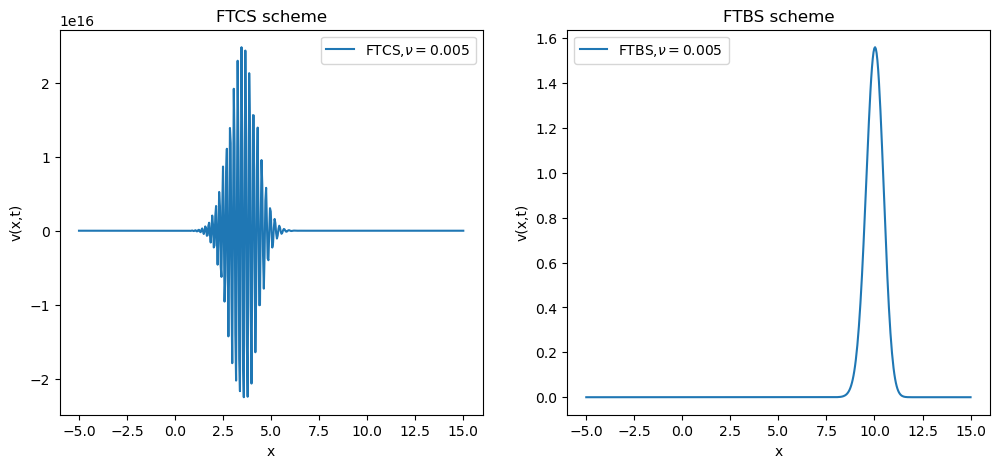

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
x_test = np.linspace(x_min, x_max, N)
axes[0].plot(x_test, FTCS_sol, '-', label=r'FTCS,$\nu=$'+f'{nu_test}')
axes[0].set_title("FTCS scheme")
axes[0].set_xlabel("x")
axes[0].set_ylabel("v(x,t)")
axes[0].legend()

axes[1].plot(x_test, upwind_sol, '-', label=r'FTBS,$\nu=$'+f'{nu_test}')
axes[1].set_title("FTBS scheme")
axes[1].set_xlabel("x")
axes[1].set_ylabel("v(x,t)")
axes[1].legend()
